In [8]:
# some pakages to use
%matplotlib inline
# -*-coding:utf-8 -*-

import matplotlib
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import time
import cvxpy as cvx
import scipy
from sklearn.datasets import fetch_mldata
import sys
if sys.platform=='win32' or sys.platform=='cygwin':
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['axes.labelsize']=20 #用来正常显示负号
plt.rcParams['axes.titlesize']=20 #用来正常显示负号
matplotlib.rcParams['figure.subplot.bottom'] = 0.1
matplotlib.rcParams['figure.subplot.top'] = 0.95
matplotlib.rcParams['figure.subplot.right'] = 0.95
matplotlib.rcParams['figure.subplot.left'] = 0.1
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['xtick.labelsize'] = 15

# plt.rcParams['text.usetex']=True #用来正常显示负号
matplotlib.rcParams['figure.figsize'] = (8,8)
font = {'family' : 'SimHei',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 20}  
colors_ = np.array(colors.cnames.keys())

In [2]:
def frwe_cvx(x, P, alpha=0.1, delta=1e-5, max_times=1000):
    dim = P.shape[0]
    w = cvx.Variable(dim)
    res = cvx.norm(x-cvx.vec(w).T*P)
    entropy = cvx.sum_entries(-cvx.entr(w))
    obj = res + alpha*entropy
    constraints = [0 <= w, cvx.sum_entries(w)==1]
    prob = cvx.Problem(cvx.Minimize(obj), constraints)
    try:
        prob.solve(verbose=False, solver=cvx.ECOS)
    except:
        prob.solve(verbose=False, solver=cvx.SCS)
    return prob

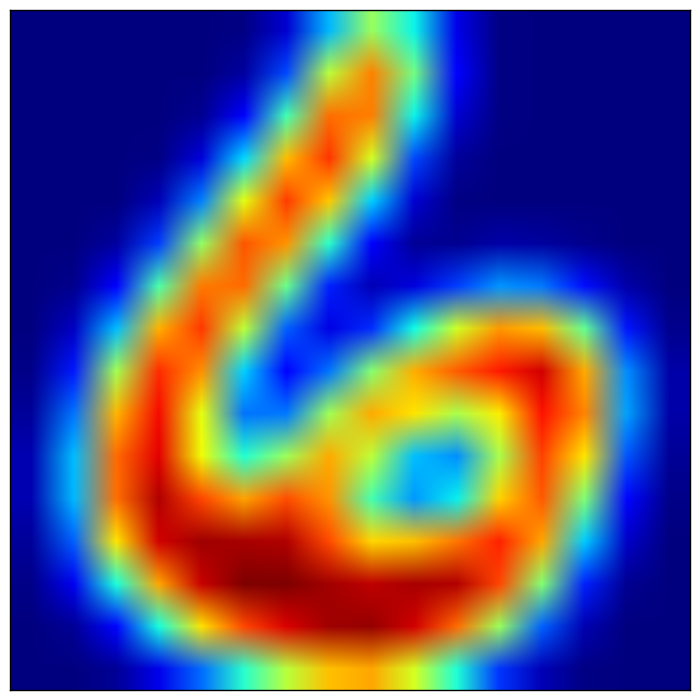

In [10]:
dataset = fetch_mldata('usps')
axes = plt.subplot(111)
axes.set_xticks([])
axes.set_yticks([])
axes.imshow(dataset.data[0].reshape(16,16),shape=[16,16])

In [3]:
dataset = fetch_mldata('MNIST original')
P=np.array([np.average(dataset.data[0:60000,:][dataset.target[0:60000]==tem,:],0) for tem in range(0,len(set(dataset.target)))])/255
X = dataset.data/255
classes = len(set(dataset.target))
dimensions = X.shape[1]
samples = X.shape[0] 
test_size = 10000